# Introduction to pyAcceLEGOrator

15.10.2021

If you haven't cloned the repo, for the first time you need to run this cell. When it is already cloned, you can skip this cell.

In [ ]:
!git clone https://github.com/potato18z/pam1-hs2021.git

The (rough) UML class diagram is given below:

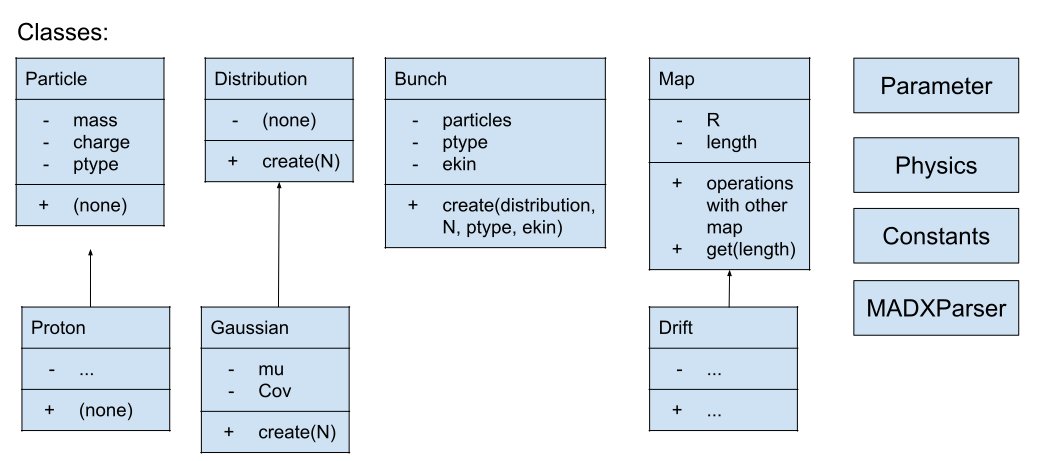

In [1]:
import sys
sys.path.append('./pam1-hs2021')
from IPython.core.display import SVG
SVG(filename='pam1-hs2021/img/uml.svg')

# Example: Bunch Distribution

<html>
<div class="alert alert-info" role="alert" style="margin-top: 10px">
The goal of this example is to create a Gaussian bunch distribution with given correlation and mean. Plot the different phase spaces $(x, px), (y, py)$ and $(z, pz)$. Play with the covariance matrix and the mean.
</div>
</html>

In a first step we need to define a class that creates a Gaussian particle
distribution. A multivariate normal distribution takes two arguments. A mean $\mu\in\mathbb{R}^{6\times 1}$ specifying the centroid and a covariance matrix $C\in\mathbb{R}^{6\times 6}$ for the correlation and size. The state vector of a particle is defined by
$$\zeta =
\begin{pmatrix}
x & [mm] \\ px & [mrad] \\ y & [mm]\\ py & [mrad]\\ z & [mm]\\ pz & [{}^\text{o}\mkern-1mu/\mkern-1mu_\text{oo}]
\end{pmatrix}$$

All distributions should be derived from the abstract base class ```Distribution```. Every child class needs to implement the function ```create(N)``` where ```N``` specifies the number of particles.

```Python
class Distribution:
    """The abstract class of distribution

    Methods
    -------
    create(N)
        the abstract method of creating N particles
    __str__()
        construct a formatted string of the distribution information
    """

    def __init__(self):
        pass


    @abstractmethod
    def create(self, N):
        pass


    @abstractmethod
    def __str__(self):
        """Construct a formatted string of the distribution information

        Returns
        -------
        info
            a string of distribution information
        """

        sign = '*' * 51
        info = sign + '\n'\
               + 'Distribution information:\n' \
               + '         Empty Distribution\n'\
               + sign
        return info
```

For example, Gaussian is inherited from the Distribution class.
```python
class Gaussian(Distribution):
    """A class of Gaussian distribution

    Attributes
    ----------
    __mu : array of (6,)
        mean of Gaussian distribution of the 6-vectors
    __cov : array of (6, 6)
        covariance matrix of Gaussian distribution of the 6-vectors

    Methods
    -------
    create(N)
        create N particles following the Gaussian distribution
    __str__()
        construct a formatted string of the Gaussain distribution information
    """

    def __init__(self, mu, C):
        """Define the distribution parameters

        Parameters
        ----------
        mu : array of (6,)
            mean of Gaussian distribution of the 6-vectors
        C : array of (6, 6)
            covariance matrix of Gaussian distribution of the 6-vectors
        """

        super(Gaussian, self).__init__()
        self.__mu = mu
        self.__cov = C


    def create(self, N):
        """Create N particles following the Gaussian distribution

        Parameters
        ----------
        N : int
            number of particles

        Returns
        -------
            an array of (6, N), 6-vectors of all particles
        """

        return np.random.multivariate_normal(self.__mu,
                                             self.__cov, N).T


    def __str__(self):
        """Construct a formatted string of the Gaussain distribution information

        Returns
        -------
        info
            a string of Gaussain distribution information
        """

        sign = '*' * 51
        info = sign + '\n'\
               + 'Distribution information:\n' \
               + '         Gaussian Distribution\n'\
               + '         Parameter:\n'\
               + '             * mean:\t\t' + str(self.__mu) + '\n'\
               + '             * covariance:\t' + str(self.__cov.tolist()) + '\n'\
               + sign
        return info
```

Now we are ready to create a distribution. Generate a distribution of 1000 particles with
$$\mu = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0\end{pmatrix}$$

and covariance matrix

$$C =
\begin{pmatrix}
16 & 0 & 0  & 0 & 0     & 0 \\
0  & 1 & 0  & 0 & 0     & 0 \\
0  & 0 & 16 & 0 & 0     & 0 \\
0  & 0 & 0  & 1 & 0     & 0 \\
0  & 0 & 0  & 0 & 0.709 & 0.0 \\
0  & 0 & 0  & 0 & 0     & 0.0981
\end{pmatrix}.
$$

In [1]:
from AcceLEGOrator import Gaussian
import numpy as np

# mean
mu = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# covariance matrix
C = np.array([[ 16.0, 0.0,  0,  0,  0, 0],
              [ 0.0, 1.0,  0,  0,  0, 0],
              [ 0,  0, 16.0,  0.0,  0, 0],
              [ 0,  0, 0.0, 1,  0, 0],
              [ 0,  0,  0,  0, 0.709, 0.0],
              [ 0,  0,  0,  0,  0.0, 0.0981]])

# instantiate distribution object
D = Gaussian(mu, C)

In [2]:
print(D)

***************************************************
Distribution information:
         Gaussian Distribution
         Parameter:
             * mean:		[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
             * covariance:	[[16.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 16.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.709, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0981]]
***************************************************


As a last step before creating a beam, we need to define its particle species. We simply need the particle mass and charge. Define the Proton particle below. Our ```Proton``` class inherits from ```Particle```.

```Python
class Particle(object):
    """The base class of all particles

    Attributes
    ----------
    mass : float
        particle mass in MeV /c^2
    charge : float
        particle charge in e
    ptype : Particle
        a specific type of particle, a class inherited from the Particle class

    Methods
    -------
    __str__()
        construct a formatted string of particle information
    """

    def __init__(self, mass, charge, ptype):
        self.mass = mass        # MeV / c^2
        self.charge = charge    # e
        self.ptype = ptype      # string specifying type

    def __str__(self):
        info =   '           particle:\t\t' + self.ptype + '\n'\
               + '             * charge:\t\t' + str(self.charge * Constants.echarge) + ' C\n'\
               + '             *   mass:\t\t' + str(self.mass) + ' MeV/c^2\n'
        return info

class Proton(Particle):

    def __init__(self):
        super(Proton, self).__init__(Constants.pmass,
                                     1.0,
                                     'Proton')
```
In ```Constants.py``` we  have some useful constants defined, i.e.

```Python
class Constants:
    clight     = codata.value('speed of light in vacuum')                   # m / s
    echarge    = codata.value('elementary charge')                          # C
    pmass      = codata.value('proton mass energy equivalent in MeV')       # MeV / c^2
    emass      = codata.value('electron mass energy equivalent in MeV')     # MeV / c^2
```
etc.

Now you are ready to create a beam. In order to create a bunch call the member function of ```Bunch```. The method looks as follows:

```Python
def create(self, distribution, N, ptype, ekin):
        """Create N particles of ptype with energy ekin, following a distribution

        Parameters
        ----------
        distribution : Distribution
            a specific distribution, a class inherited from the Distribution class
        N : int
            The number of particles
        ptype : Particle
            a specific type of particle, a class inherited from the Particle class
        ekin : array of (N,)
            kinetic energy of all particles
        """
        ...
```

In [3]:
from AcceLEGOrator import Proton, Constants, Bunch

# instantiate Proton particle
particle = Proton()

# kinetic energy [MeV]
ekin = 230

# instantiate bunch
bunch = Bunch()

bunch.create(distribution = D, N = 1000,
             ptype = particle, ekin = ekin)

Finally, plot the different phase spaces, i.e. $(x, x')$, $(y, y')$ and $(z, z')$. In order to obtain all values of for example phase space variable ```x```, one can simply call
```Python
x = bunch['x']
```
all other variables are obtained accordingly. Just pay attention with the syntax for ```x'```, ```y'``` and ```z'```. First, write a function that does a scatter plot.

In [4]:
from matplotlib import pyplot as plt

# param ax is the axis to plot on
# param xvar phase space variable in x-dir
# param yvar phase space variable in y-dir
# param xlab label for x-axis
# param ylab label for y-axis
def plot_phase_space(ax, xvar, yvar, xlab, ylab):
    vmin = min(min(xvar), min(yvar))
    vmin += 0.1 * vmin
    vmax = max(max(xvar), max(yvar))
    vmax += 0.1 * vmax
    
    ax.set_xlim(vmin, vmax)
    ax.set_ylim(vmin, vmax)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.scatter(xvar, yvar, s=1)

Use above method to do your plots.

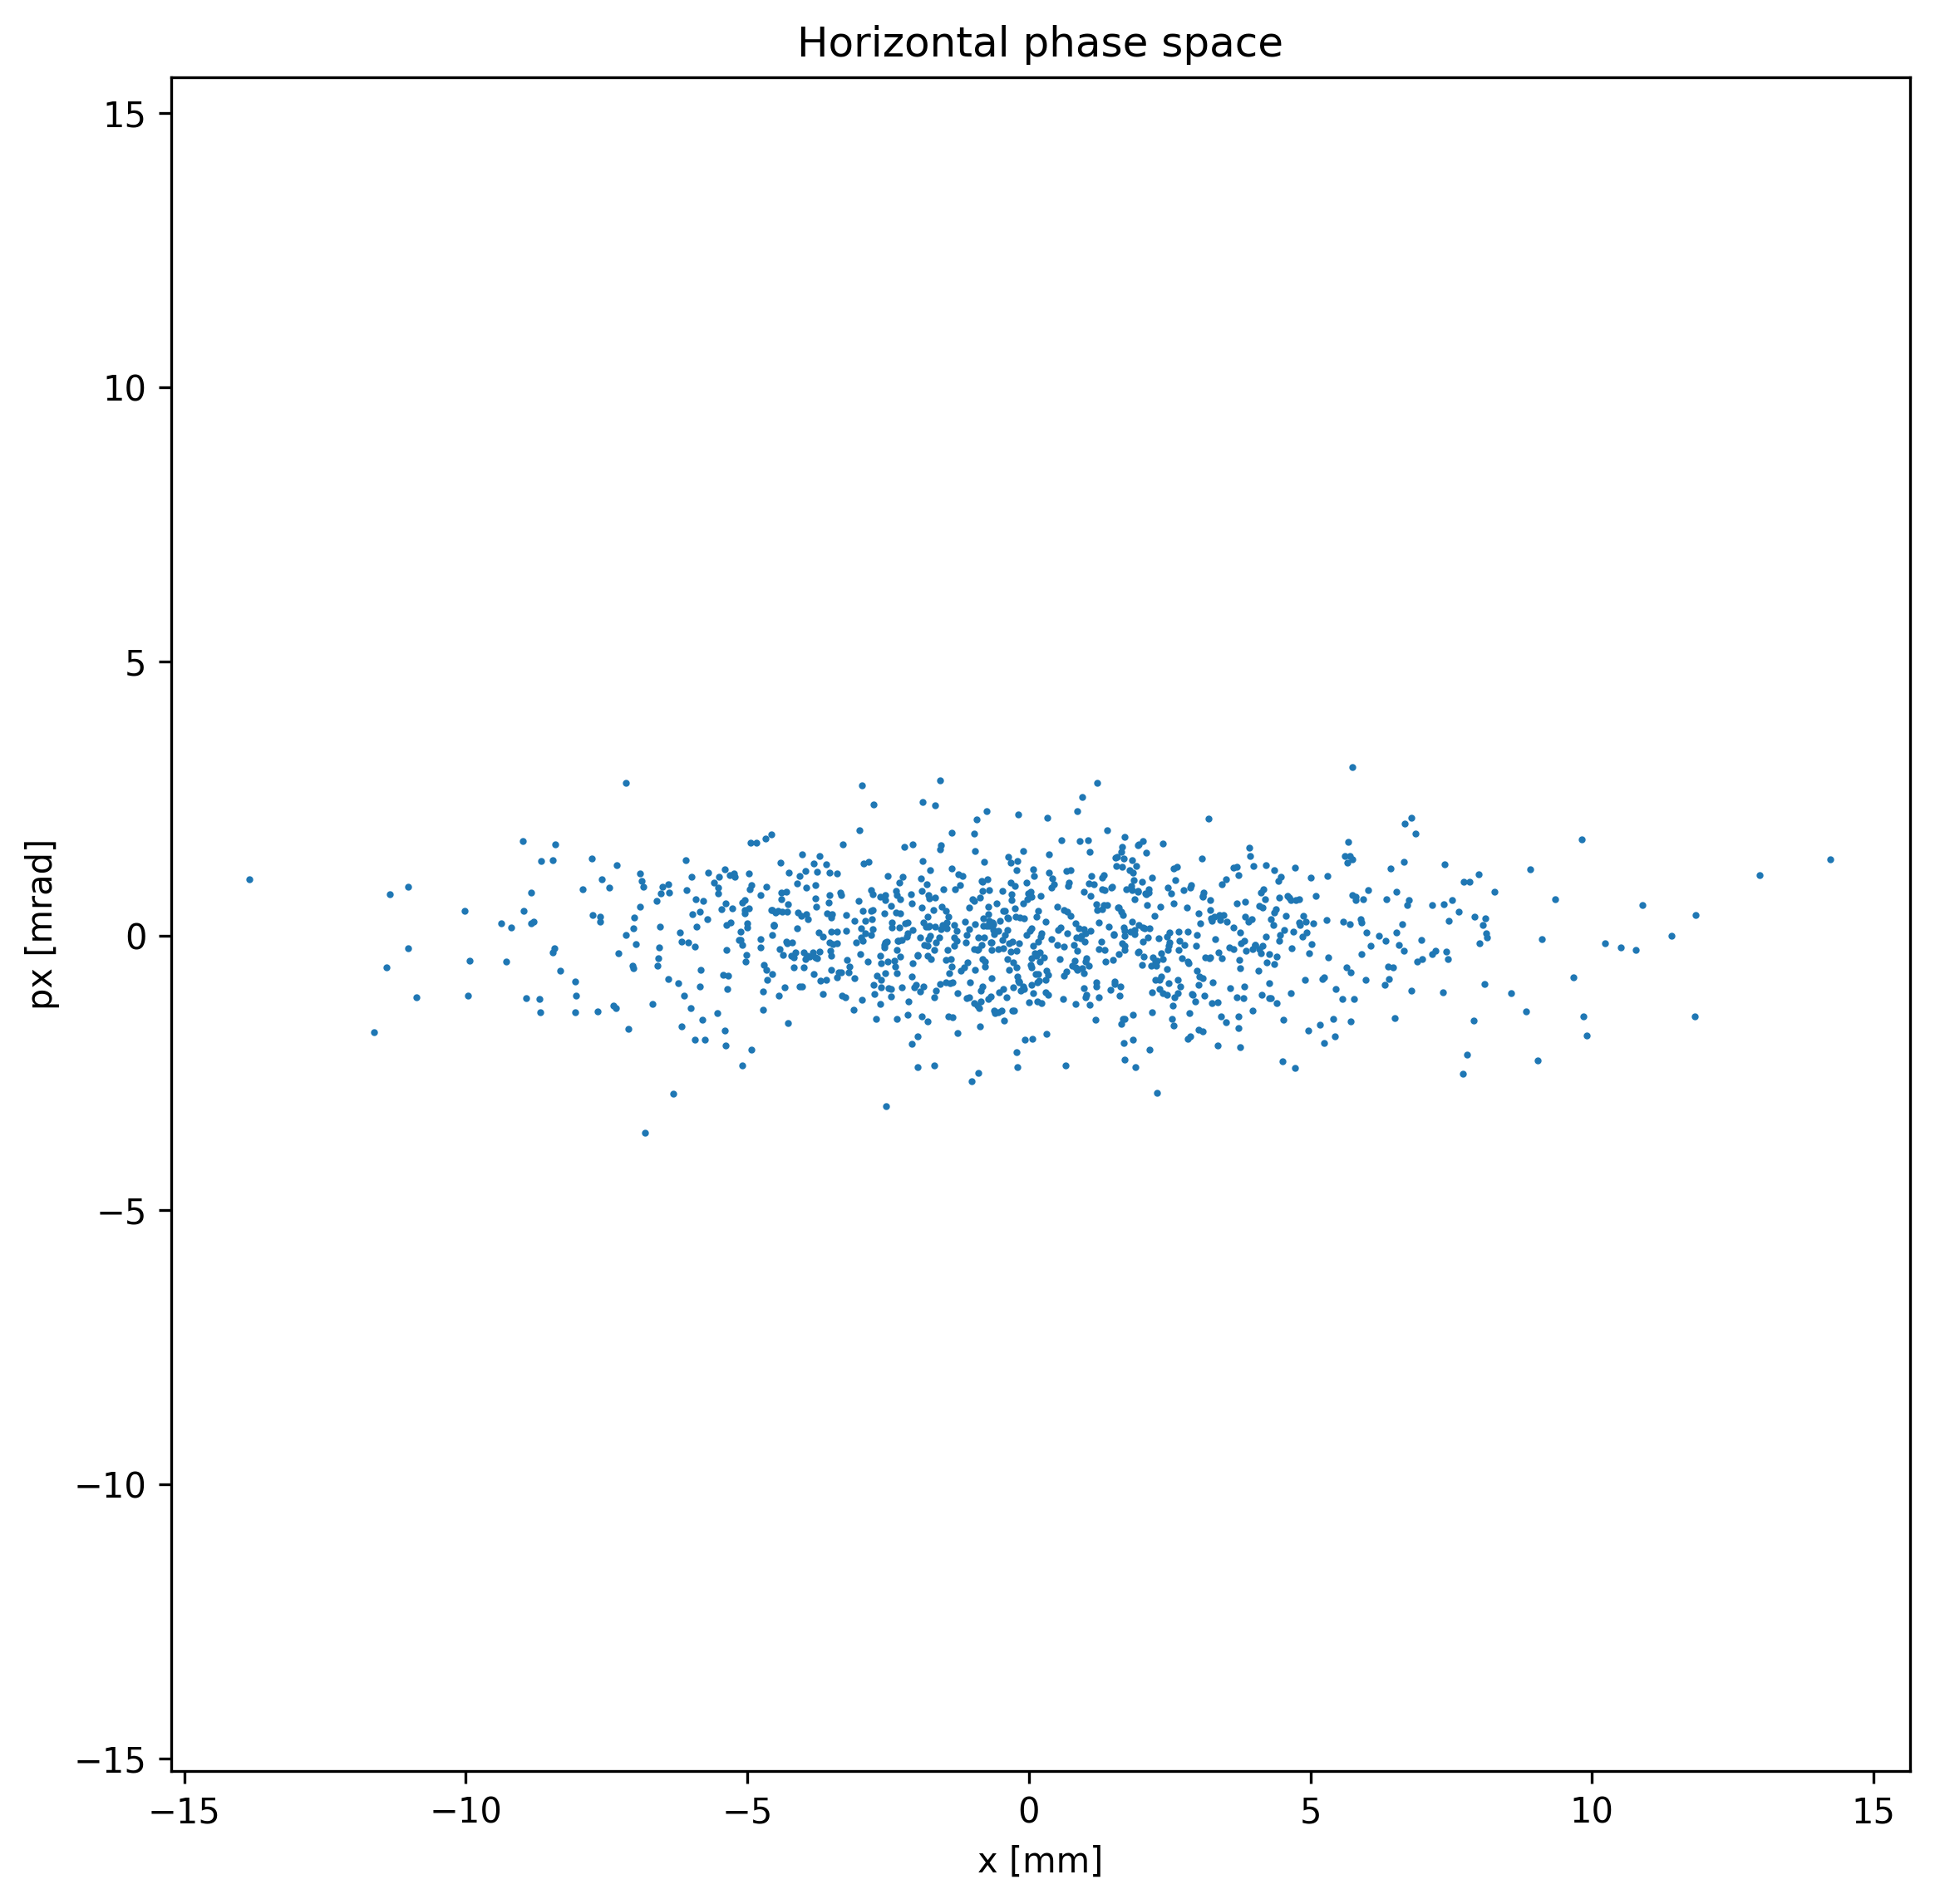

In [5]:
fig = plt.figure(dpi=300)
fig.set_size_inches(9,9)
ax = fig.add_subplot(111)
ax.set_title('Horizontal phase space')

plot_phase_space(ax, bunch['x'], bunch["px"], "x [mm]", "px [mrad]")
plt.show()

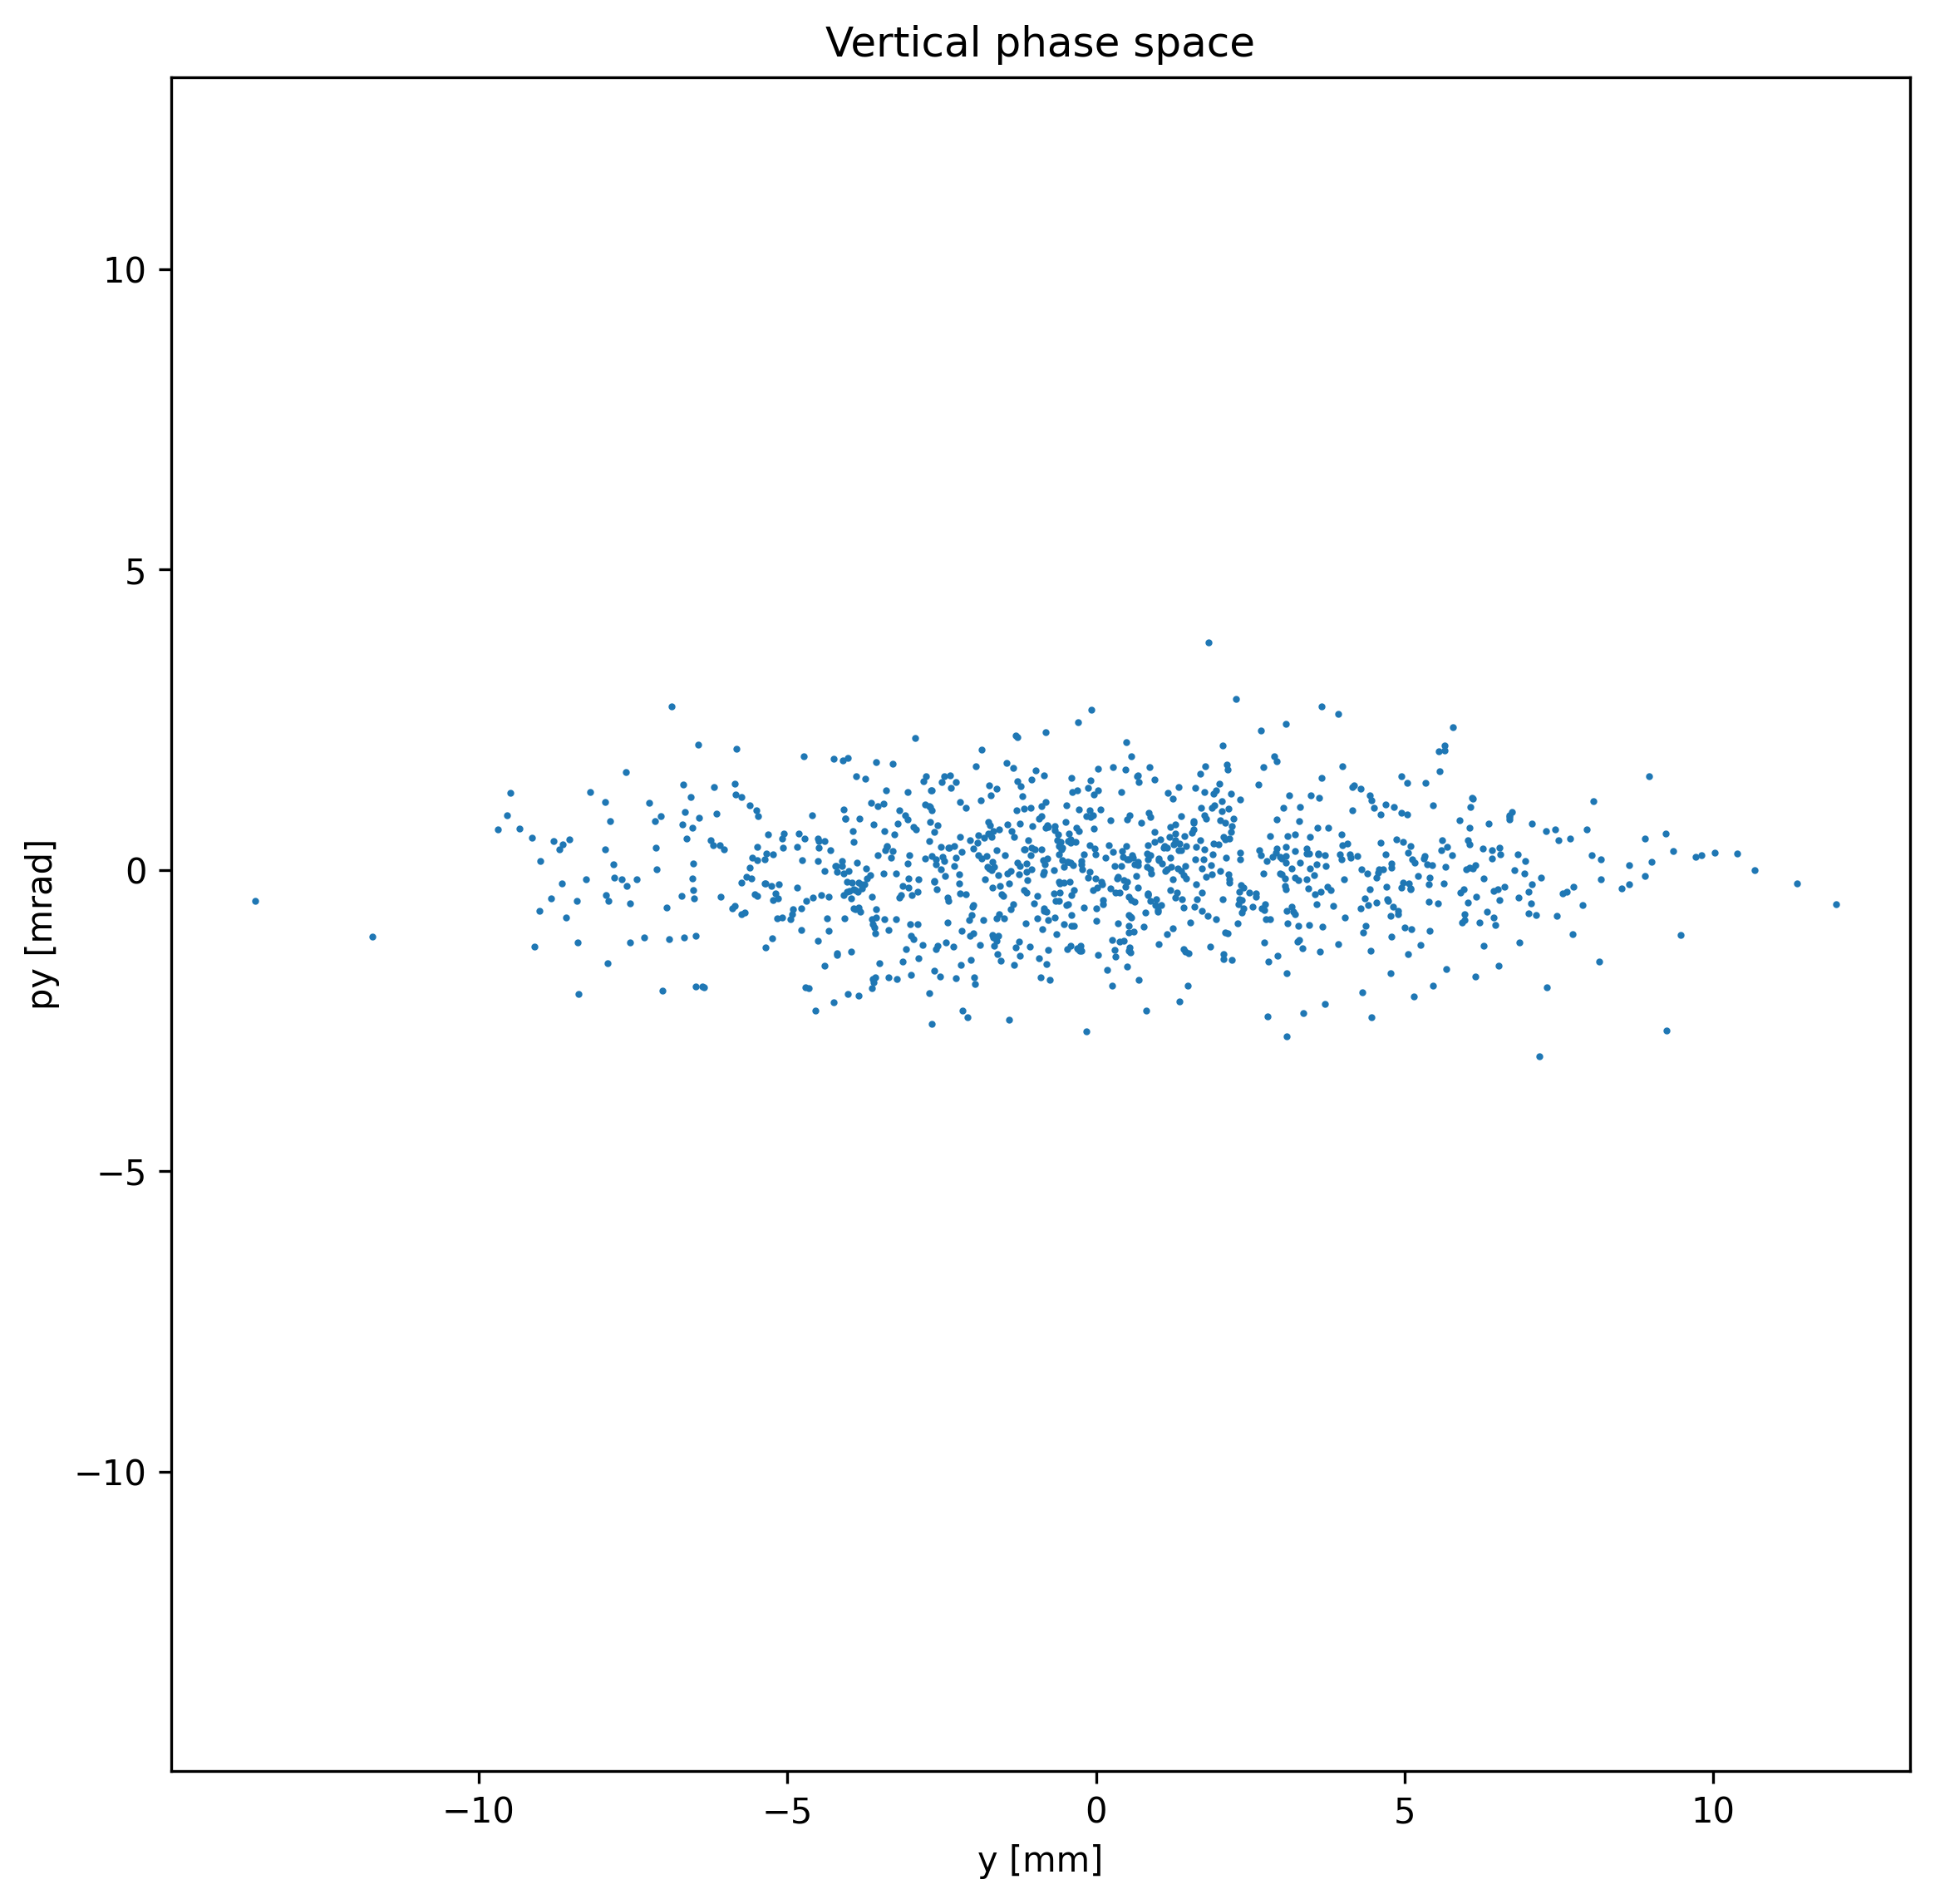

In [6]:
fig = plt.figure(dpi=300)
fig.set_size_inches(9,9)
ax = fig.add_subplot(111)
ax.set_title('Vertical phase space')

plot_phase_space(ax, bunch['y'], bunch["py"], "y [mm]", "py [mrad]")
plt.show()

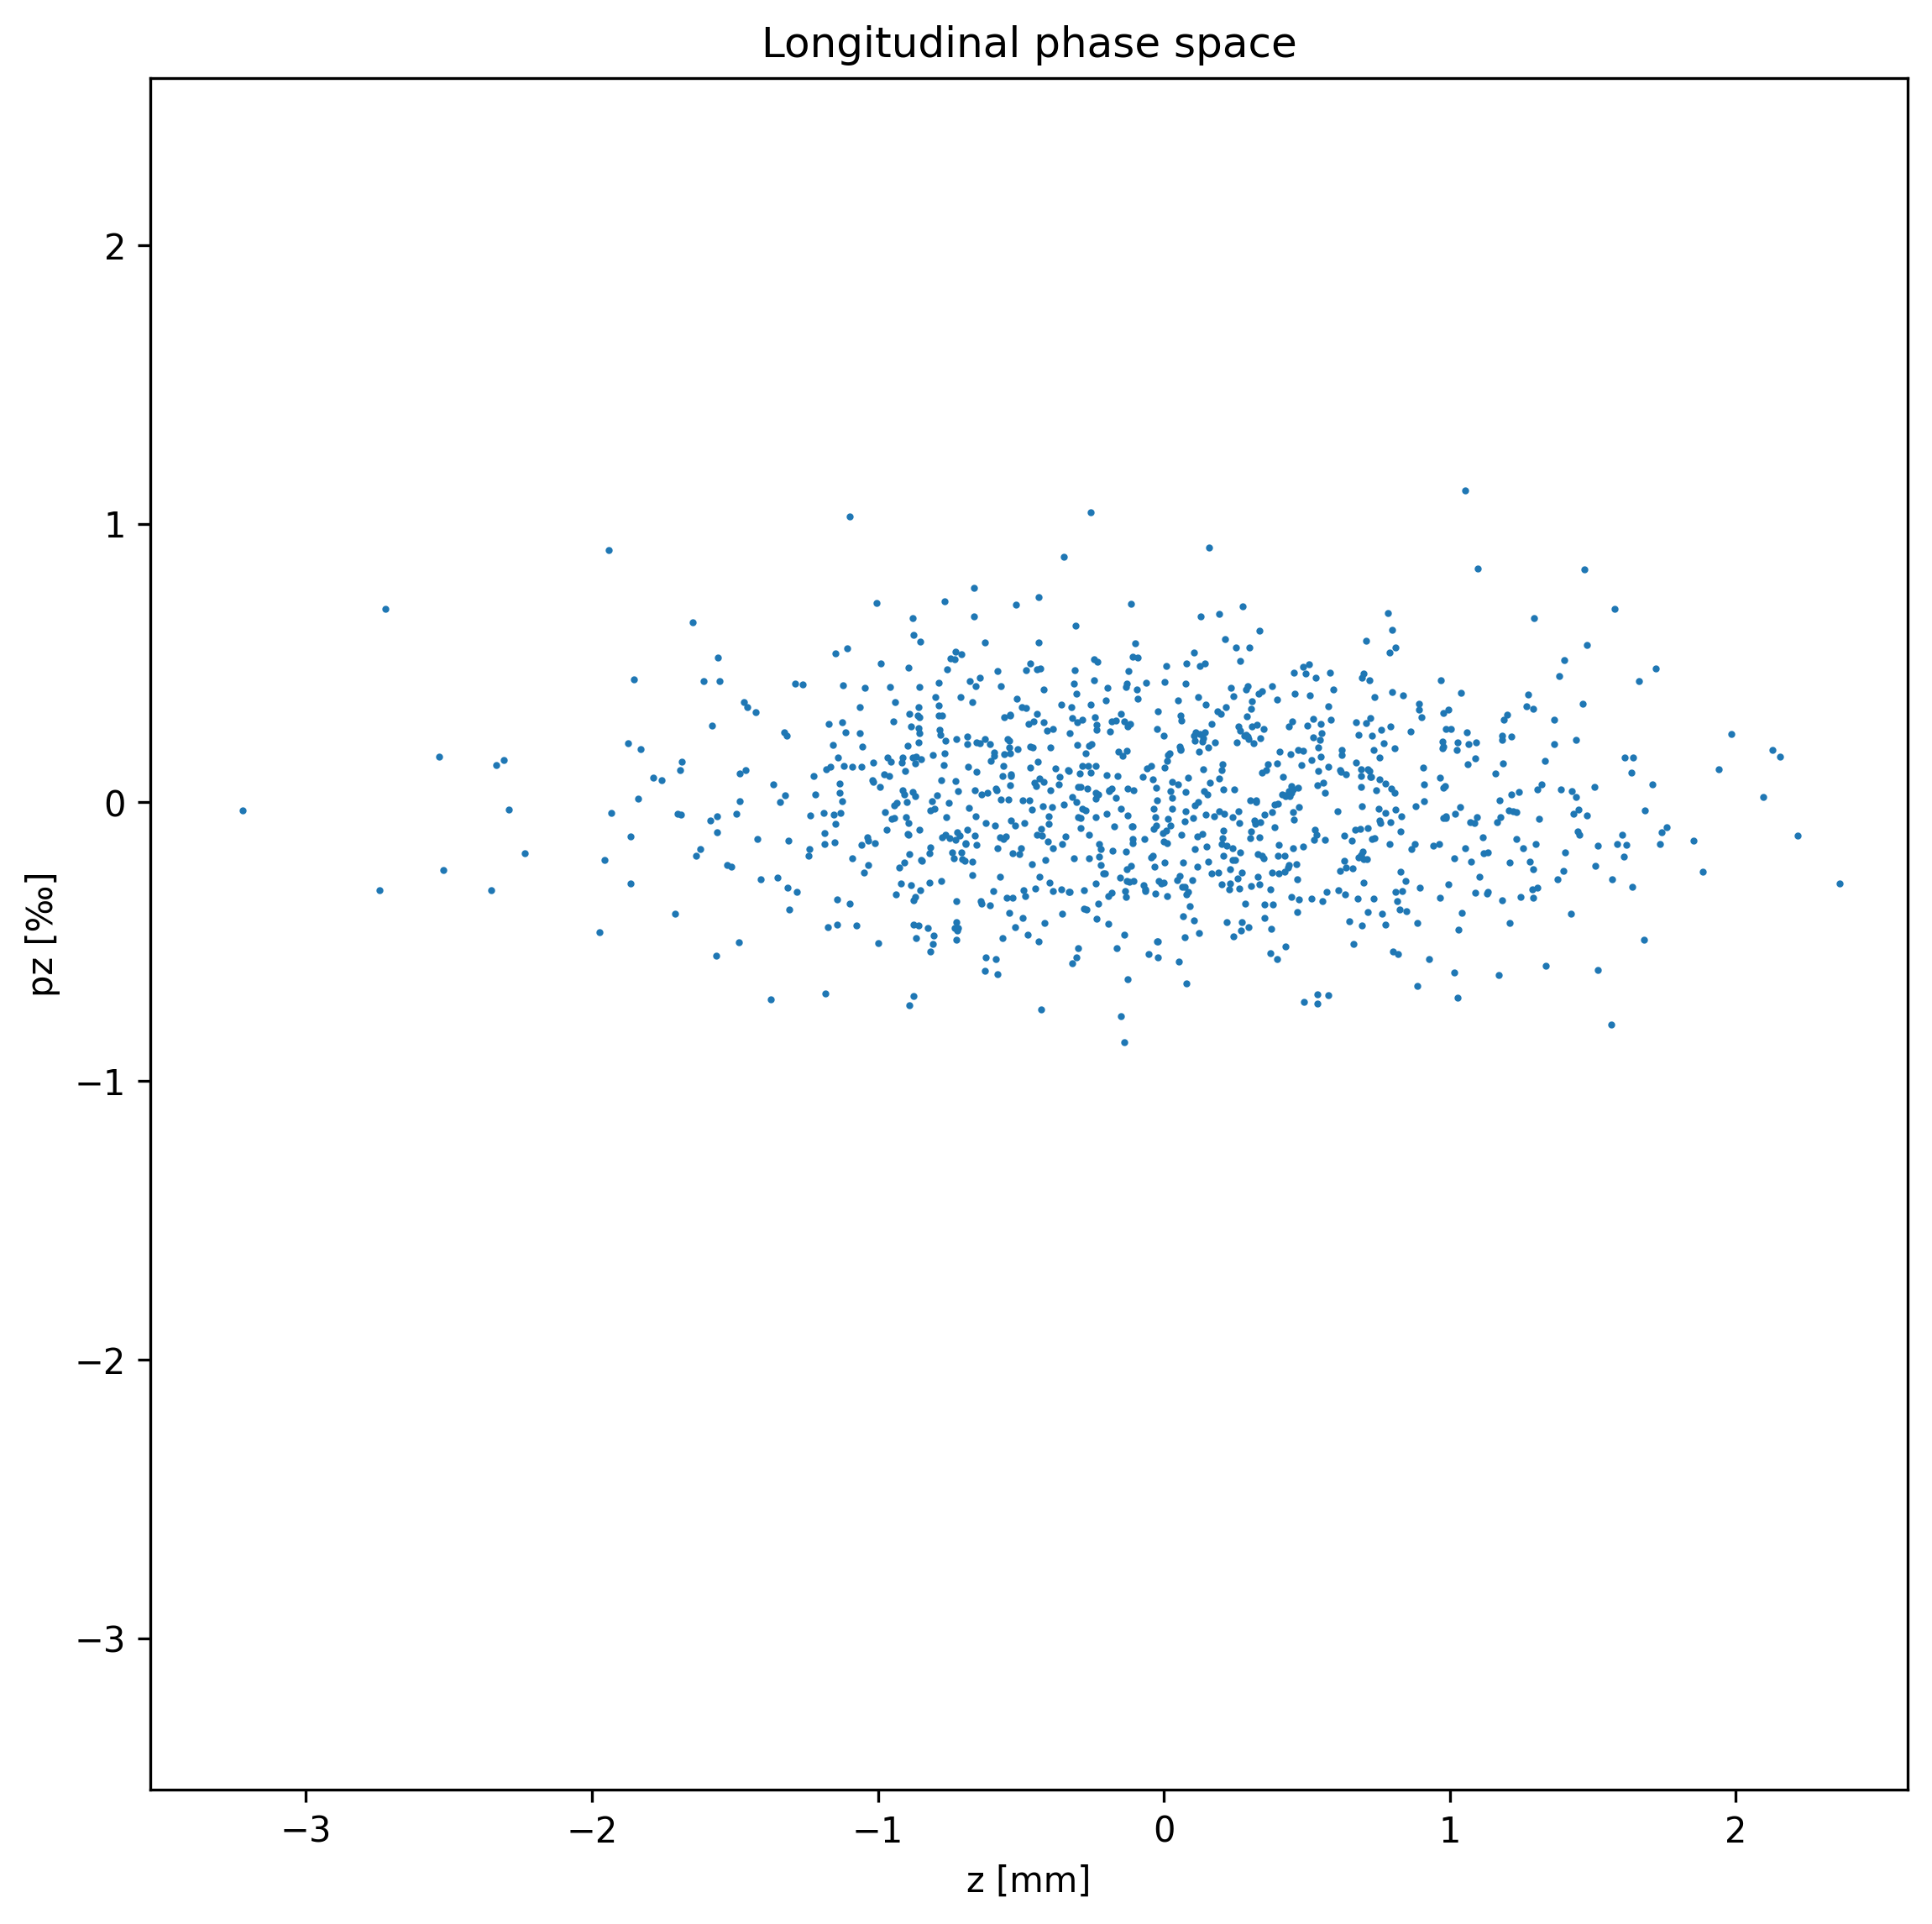

In [7]:
fig = plt.figure(dpi=300)
fig.set_size_inches(9,9)
ax = fig.add_subplot(111)
ax.set_title('Longitudinal phase space')

plot_phase_space(ax, bunch['z'], bunch["pz"], "z [mm]", "pz [\u2030]")
plt.show()

<html>
<div class="alert alert-info" role="alert" style="margin-top: 10px">
Play around: Try to define a Electron class and then create an electron bunch. Plot the phase space.
</div>
</html>